In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Carregar o dataset
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

# Remover colunas irrelevantes
df.drop(['customerID'], axis=1, inplace=True)

# Converter 'TotalCharges' para numérico, tratando erros
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Preencher valores ausentes com a mediana
df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)

# Codificar variáveis categóricas
for column in df.select_dtypes(include=['object']).columns:
    if df[column].nunique() == 2:
        # Codificação binária
        df[column] = LabelEncoder().fit_transform(df[column])
    else:
        # Codificação one-hot
        df = pd.get_dummies(df, columns=[column])

# Separar features e target
X = df.drop('Churn', axis=1)
y = df['Churn']

# Dividir em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


<ipython-input-1-1b09f54fc5c5>:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)


In [2]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Treinar o modelo
model_full = RandomForestClassifier(random_state=42)
model_full.fit(X_train, y_train)

# Avaliar o modelo
y_pred_full = model_full.predict(X_test)
acc_full = accuracy_score(y_test, y_pred_full)
print(f"Acurácia com todas as features: {acc_full:.4f}")


Acurácia com todas as features: 0.7894


In [3]:
from sklearn.decomposition import PCA

# Padronizar os dados
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Aplicar PCA
pca = PCA(n_components=0.95)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Treinar o modelo com dados reduzidos
model_pca = RandomForestClassifier(random_state=42)
model_pca.fit(X_train_pca, y_train)

# Avaliar o modelo
y_pred_pca = model_pca.predict(X_test_pca)
acc_pca = accuracy_score(y_test, y_pred_pca)
print(f"Acurácia com PCA: {acc_pca:.4f}")


Acurácia com PCA: 0.7719


In [4]:
from sklearn.feature_selection import SelectKBest, f_classif

# Aplicar SelectKBest
selector = SelectKBest(score_func=f_classif, k=10)
X_train_kbest = selector.fit_transform(X_train, y_train)
X_test_kbest = selector.transform(X_test)

# Treinar o modelo com features selecionadas
model_kbest = RandomForestClassifier(random_state=42)
model_kbest.fit(X_train_kbest, y_train)

# Avaliar o modelo
y_pred_kbest = model_kbest.predict(X_test_kbest)
acc_kbest = accuracy_score(y_test, y_pred_kbest)
print(f"Acurácia com SelectKBest: {acc_kbest:.4f}")


Acurácia com SelectKBest: 0.7619


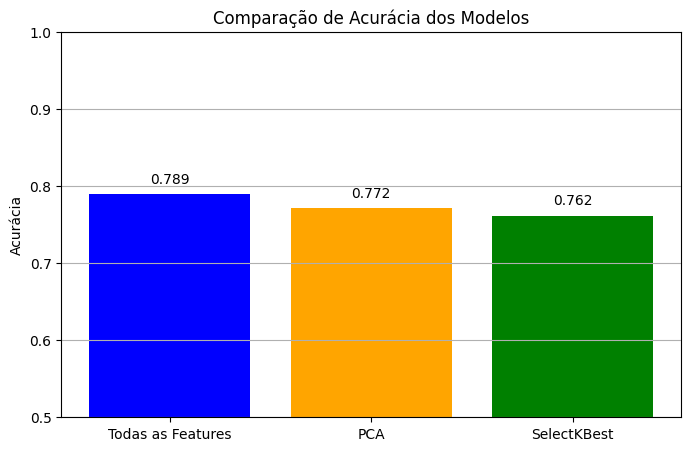

In [5]:
import matplotlib.pyplot as plt

# Dados para o gráfico
labels = ['Todas as Features', 'PCA', 'SelectKBest']
accuracies = [acc_full, acc_pca, acc_kbest]

# Criar o gráfico de barras
plt.figure(figsize=(8, 5))
bars = plt.bar(labels, accuracies, color=['blue', 'orange', 'green'])
plt.title('Comparação de Acurácia dos Modelos')
plt.ylabel('Acurácia')
plt.ylim(0.5, 1.0)

# Adicionar valores nas barras
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, f'{yval:.3f}', ha='center', va='bottom')

plt.grid(axis='y')
plt.show()
